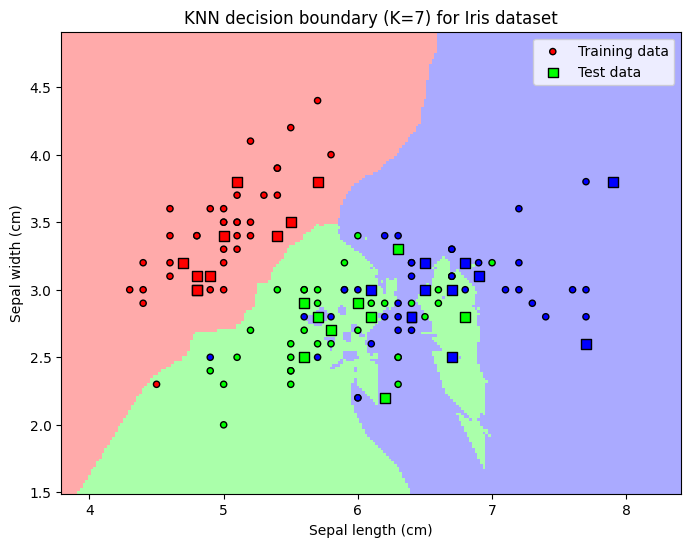

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

# Load the Iris dataset from sklearn and convert it to a DataFrame
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Extract features (X) and target (y) from the DataFrame
X = iris_df[['sepal length (cm)', 'sepal width (cm)']].values
y = iris_df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier with K = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for decision boundaries
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Bold colors for data points
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='s', label='Test data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('KNN decision boundary (K=7) for Iris dataset')
plt.legend()

plt.show()
